In [224]:
# pip install geopandas

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import trim_mean
from statsmodels import robust
import seaborn as sns
from wordcloud import WordCloud

Conditions Contibuting to Covid-19 for each state of USA

In [202]:
# Import data
data = pd.read_csv('covid19.csv')
# set display option because we have a lot of features to visualize
pd.set_option('display.max_columns',20)
# Visulize data
data.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1569.0,1647.0,NaN
1,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5804.0,6029.0,NaN
2,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15080.0,15699.0,NaN
3,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37414.0,38878.0,NaN
4,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82668.0,85708.0,NaN


In [203]:
# let's check for Null Values if existed
checkNull = data.isna().any()
if checkNull.any()==1:
    NullFeatures = checkNull[checkNull==1]
    # the treatment is fillna with 0 because the features doesnt have a 0 value to make a coincidence between the nan converted and the real value
    data.fillna(0,inplace=True)
    # Verification
    print(f'Data contains any null values:{data.isna().any().any()}')
else:
    print('No Null values')

Data contains any null values:False


In [204]:
# let's check for duplicated Records
if data.duplicated().sum()==0:
    print('No duplicated Records')

No duplicated Records


In [205]:
# let's change data types of our dataset for type consitency 
# First check current data types
data.info()
# Our transformation
data['Data As Of'] = pd.to_datetime(data['Data As Of'])
data['Start Date'] = pd.to_datetime(data['Start Date'])
data['End Date'] = pd.to_datetime(data['End Date'])
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)
data['Condition'] = data['Condition'].astype('category')
data['Age Group'] = data['Age Group'].astype('category')
# Verification
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621000 entries, 0 to 620999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          621000 non-null  object 
 1   Start Date          621000 non-null  object 
 2   End Date            621000 non-null  object 
 3   Group               621000 non-null  object 
 4   Year                621000 non-null  float64
 5   Month               621000 non-null  float64
 6   State               621000 non-null  object 
 7   Condition Group     621000 non-null  object 
 8   Condition           621000 non-null  object 
 9   ICD10_codes         621000 non-null  object 
 10  Age Group           621000 non-null  object 
 11  COVID-19 Deaths     621000 non-null  float64
 12  Number of Mentions  621000 non-null  float64
 13  Flag                621000 non-null  object 
dtypes: float64(4), object(10)
memory usage: 66.3+ MB
<class 'pandas.core.frame.DataFrame

In [206]:
# now we will group data and see what insights we can get for 2019--2023
# 1. Condition Group impact on covid deaths
cdt_grp_death_mean = data.groupby('Condition Group')['COVID-19 Deaths'].mean().apply(lambda x: np.round(x,2)).sort_values(ascending=False)
# 2. Condition impact on covid deaths
Condition_mean_death  = data.groupby('Condition')['COVID-19 Deaths'].mean().apply(lambda x: np.round(x,2)).sort_values(ascending=False)
# 3. Age Grp with higher  covid deaths
age_grp_mean_death  = data[data['Age Group']!='All Ages'].groupby('Age Group')['COVID-19 Deaths'].mean().apply(lambda x: np.round(x,2)).sort_values(ascending=False)
# 4. State with higher covid deaths
state_mean_death = data[data['State']!='United States'].groupby('State')['COVID-19 Deaths'].mean().apply(lambda x: np.round(x,2)).sort_values(ascending=False)
# 5. How often a condition is named in the data set
cdt_mention = data.groupby('Condition')['Number of Mentions'].sum()
# 4. State vs condition is named in the data set
state_mention = data[data['State']!='United States'].groupby('State')['Number of Mentions'].mean().sort_values(ascending=False)

As we can see, aside from residuals and COVID-19, respiratory diseases are the highest condition group with the most COVID-19 deaths.


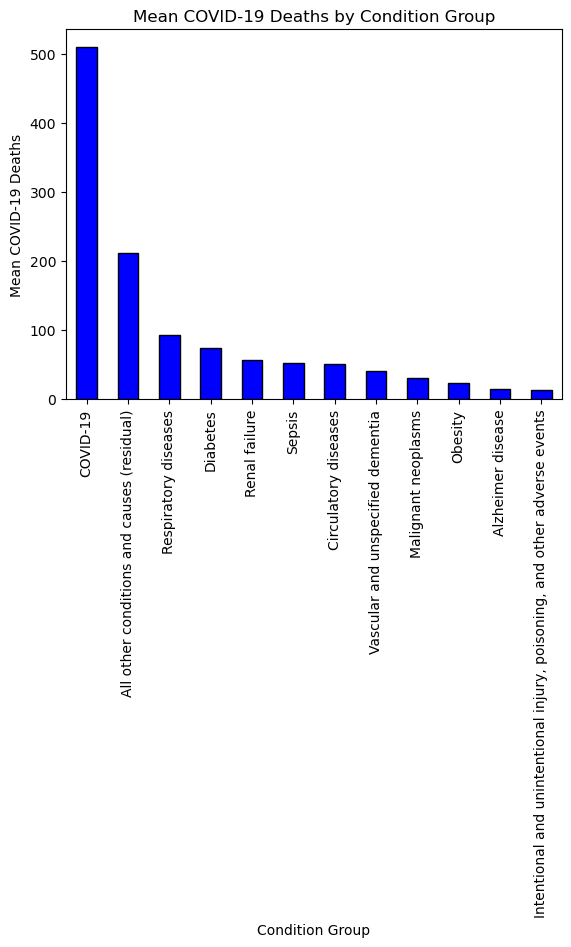

In [207]:
# let's visualize the metrics we found
%matplotlib inline
cdt_grp_death_mean.reset_index().plot(x='Condition Group', y='COVID-19 Deaths',kind='bar',legend=False,color='blue',edgecolor='black')
plt.xlabel('Condition Group')
plt.ylabel('Mean COVID-19 Deaths')
plt.title('Mean COVID-19 Deaths by Condition Group')
print("As we can see, aside from residuals and COVID-19, respiratory diseases are the highest condition group with the most COVID-19 deaths.")

In [208]:
# cHECK FOR Condition Group
condition_value = 'Respiratory diseases'

# Check if the condition value is included in the 'Condition Group' column
is_included = condition_value in data['Condition Group'].values

# Print the result
if is_included:
    print(f"The condition '{condition_value}' is included in the 'Condition Group' column.")
else:
    print(f"The condition '{condition_value}' is not included in the 'Condition Group' column.")

The condition 'Respiratory diseases' is included in the 'Condition Group' column.


As we can see, aside from residuals and COVID-19, Influenza and pneumonia condition wich is included inrespiratory diseases  has the highest condition group with the most COVID-19 deaths.


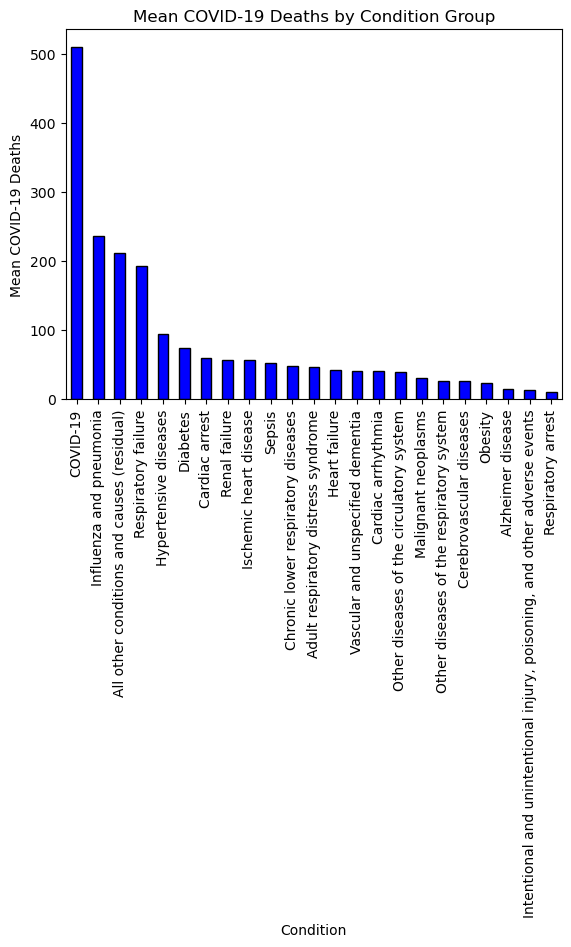

In [194]:
# let's visualize the metrics we found
%matplotlib inline
Condition_mean_death.reset_index().plot(x='Condition', y='COVID-19 Deaths',kind='bar',legend=False,color='blue',edgecolor='black')
plt.xlabel('Condition')
plt.ylabel('Mean COVID-19 Deaths')
plt.title('Mean COVID-19 Deaths by Condition Group')
print("As we can see, aside from residuals and COVID-19, Influenza and pneumonia condition wich is included inrespiratory diseases  has the highest condition group with the most COVID-19 deaths.")

As we can see, the most deaths by COVID-19 are among older people in the age range of 65-84+.


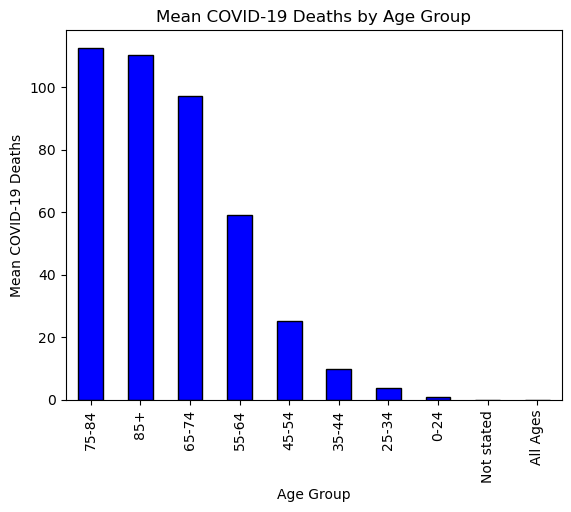

In [209]:
# let's visualize the metrics we found
%matplotlib inline
age_grp_mean_death.reset_index().plot(x='Age Group', y='COVID-19 Deaths',kind='bar',legend=False,color='blue',edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Mean COVID-19 Deaths')
plt.title('Mean COVID-19 Deaths by Age Group')
print("As we can see, the most deaths by COVID-19 are among older people in the age range of 65-84+.")

As we can see, the most deaths by COVID-19 are in California State, which is corrected based on https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/


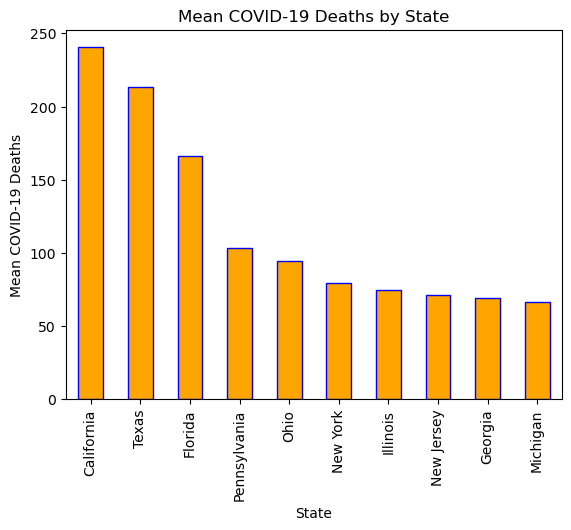

In [196]:
# let's visualize the metrics we found
%matplotlib inline
state_mean_death.reset_index().head(10).plot(x='State', y='COVID-19 Deaths',kind='bar',legend=False,color='orange',edgecolor='blue')
plt.xlabel('State')
plt.ylabel('Mean COVID-19 Deaths')
plt.title('Mean COVID-19 Deaths by State')
print("As we can see, the most deaths by COVID-19 are in California State, which is corrected based on https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/")

The deaths numbers arent equal(our values and the website stats) due to diffrent date ranges


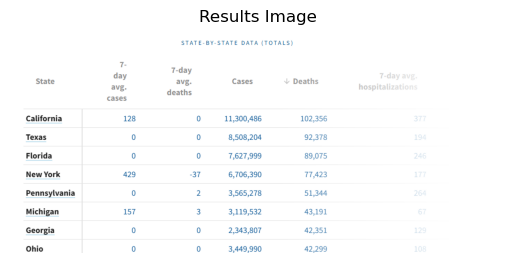

In [198]:
# Results by state
img = plt.imread('results.png')
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title('Results Image')
print('The deaths numbers arent equal(our values and the website stats) due to diffrent date ranges')

As we can see, the most deaths by COVID-19 are in California State, which is corrected based on https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/


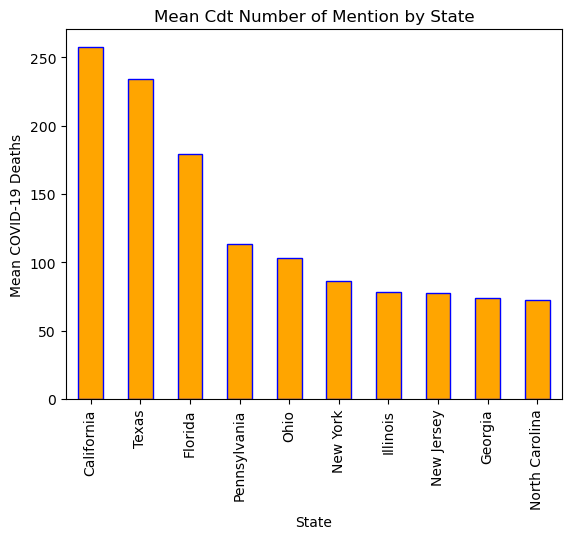

In [199]:
# Also we can see that by seeing the Avg of Condition Number of Mentions that justify that California has most deaths by Covid19
# let's visualize the metrics we found
%matplotlib inline
state_mention.reset_index().head(10).plot(x='State', y='Number of Mentions',kind='bar',legend=False,color='orange',edgecolor='blue')
plt.xlabel('State')
plt.ylabel('Mean COVID-19 Deaths')
plt.title('Mean Cdt Number of Mention by State')
print("As we can see, the most deaths by COVID-19 are in California State, which is corrected based on https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/")